In [44]:
import pandas as pd
import seaborn as sns
import folium

In [3]:
df = pd.read_csv('C:\\Users\\bchal\\OneDrive\\Documents\\stage ai\\Task 5\\US_Accidents_March23.csv')


In [4]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,Fa

In [5]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
len(df.columns)

46

In [7]:
len(df)

7728394

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [10]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [11]:
missing_percentage = df.isna().sum().sort_values(ascending = False) / len(df) * 100
missing_percentage

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Astronomical_Twilight     0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Traffic_Signal            0.000000
Roundabout                0.000000
Station                   0.000000
Stop                      0.000000
Traffic_Calming           0.000000
Country                   0.000000
Turning_Loop        

<Axes: >

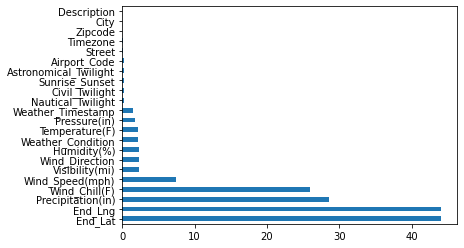

In [14]:
missing_percentage[missing_percentage !=0].plot(kind="barh")

Exploratory Analysis and Data Visualization:
Columns we'll Analyze:

City
Start Time
Start Lng, Start Lat
Temperature
Weather Condition

In [15]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
cities = df.City.unique()
len(cities)

13679

In [17]:
cities_by_accident = df.City.value_counts()
cities_by_accident

City
Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: count, Length: 13678, dtype: int64

In [18]:
cities_by_accident[:20]

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: count, dtype: int64

<Axes: ylabel='City'>

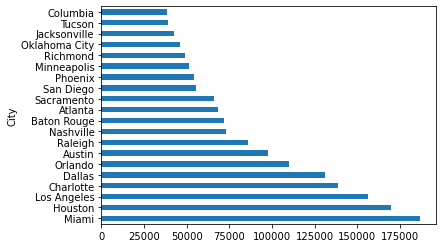

In [19]:
cities_by_accident[:20].plot(kind="barh")

In [21]:
sns.set_style("darkgrid")

C:\Users\bchal\AppData\Local\Temp\ipykernel_21048\3405282844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

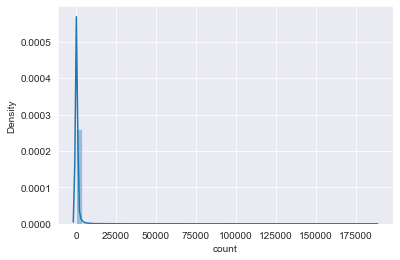

In [22]:
sns.distplot(cities_by_accident)

In [23]:
highest_cities_accident= cities_by_accident[cities_by_accident >=1000]
len(highest_cities_accident)

1218

C:\Users\bchal\AppData\Local\Temp\ipykernel_21048\498305691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(highest_cities_accident)


<Axes: xlabel='count', ylabel='Density'>

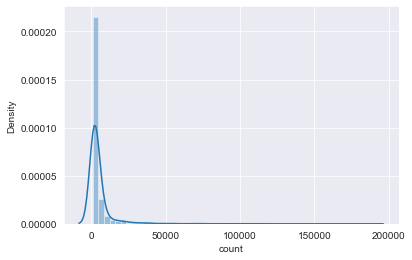

In [24]:
sns.distplot(highest_cities_accident)

In [25]:
len(highest_cities_accident) / len(cities)

0.08904159660793917

In [26]:
lowest_cities_accident= cities_by_accident[cities_by_accident <1000]
len(lowest_cities_accident)

12460

C:\Users\bchal\AppData\Local\Temp\ipykernel_21048\3397864553.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lowest_cities_accident)


<Axes: xlabel='count', ylabel='Density'>

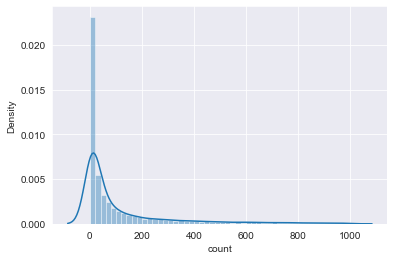

In [27]:
sns.distplot(lowest_cities_accident)

In [28]:
len(lowest_cities_accident) / len(cities)

0.910885298632941

<Axes: xlabel='count', ylabel='Count'>

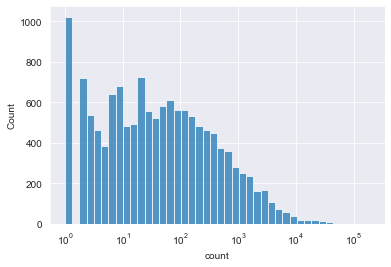

In [29]:
sns.histplot(cities_by_accident , log_scale=True)

In [30]:
cities_by_accident[cities_by_accident ==1]

City
Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: count, Length: 1023, dtype: int64

In [31]:
df.Start_Time

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [32]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [33]:
df.Start_Time[0]

Timestamp('2016-02-08 05:46:00')

C:\Users\bchal\AppData\Local\Temp\ipykernel_21048\1756728629.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour , bins =24 , norm_hist=True ,kde= False)


<Axes: xlabel='Start_Time'>

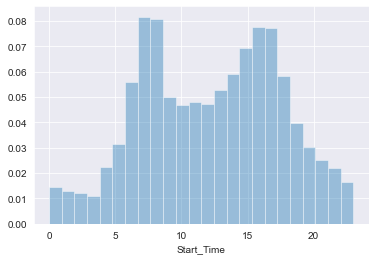

In [34]:
sns.distplot(df.Start_Time.dt.hour , bins =24 , norm_hist=True ,kde= False)

C:\Users\bchal\AppData\Local\Temp\ipykernel_21048\308908771.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

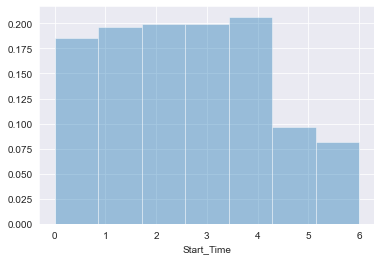

In [35]:
sns.distplot(df.Start_Time.dt.dayofweek, bins=7, kde=False, norm_hist=True)

C:\Users\bchal\AppData\Local\Temp\ipykernel_21048\3630331899.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

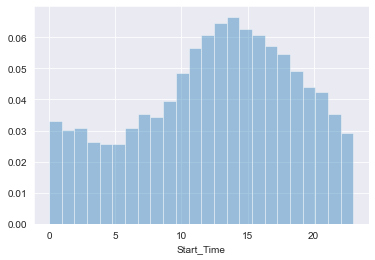

In [36]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

C:\Users\bchal\AppData\Local\Temp\ipykernel_21048\4268565558.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

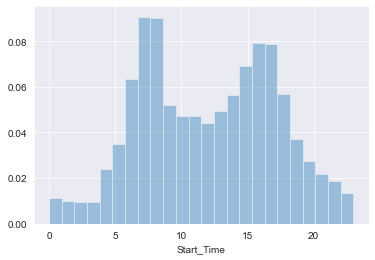

In [37]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins=24, kde=False, norm_hist=True)

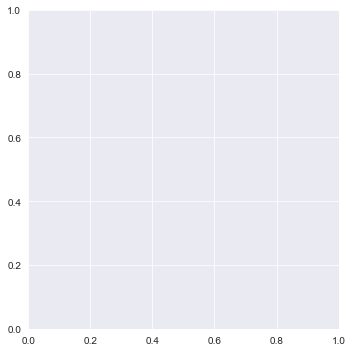

In [38]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_Bing = df_2019[df_2019.Source == 'MapQuest']
sns.displot(df_2019_Bing.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

<Axes: ylabel='count'>

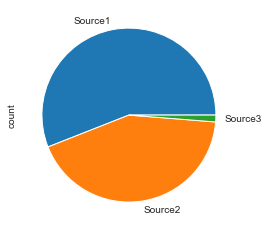

In [39]:
df.Source.value_counts().plot(kind='pie')

In [40]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

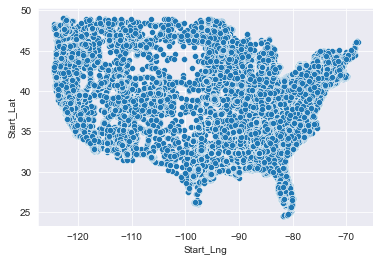

In [42]:
sample_df = df.sample(int(0.1 *len(df)))
sns.scatterplot(x=sample_df.Start_Lng,y= sample_df.Start_Lat)

In [45]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [46]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).items():
    print(x[1])

5164415    33.462697
6909446    38.860584
4817590    32.827772
844024     33.396790
5180275    33.653034
             ...    
3255731    35.388496
710303     40.305580
271108     30.443552
406566     34.043037
2427554    36.153225
Name: Start_Lat, Length: 100, dtype: float64
5164415   -112.182515
6909446    -77.355648
4817590    -97.382812
844024     -81.026932
5180275   -117.907553
              ...    
3255731   -114.253517
710303     -83.068939
271108     -97.707764
406566    -118.217239
2427554    -86.756248
Name: Start_Lng, Length: 100, dtype: float64
